# HW2. 미분방정식

1. Runge-Kutta 방법과 Modified Euler 방법 각각의 오차가 $O(\Delta t^3)$임을 보이시오. [20pts]

수정 오일러 방법의 경우 $x(t+\Delta t) = x(t) + \dfrac{f(x) + f(\bar x)}{2}\Delta t$, $\bar x \equiv x(t+\Delta t) = x(t) + \Delta t f(x)$로 나타낼 수 있고, 이때 우변을 테일러 전개하면 \\
\begin{aligned} & x(t)+\frac{f(x)+f(x+\Delta t f(x))}{2} \Delta t \\ & =x(t)+\frac{\Delta t}{2}\left[f(x)+\left(f(x)+\Delta t \frac{d f}{d t} f(x)+O\left(\Delta t^2\right)\right)\right] \\ & =x(t)+f(x)\Delta t + \frac{1}{2} \frac{d f}{d t} f(x) \Delta t^2 +O(\Delta t^3)\end{aligned} \\
이므로 $O(\Delta t^2)$의 정확도와 $O(\Delta t^3)$의 오차를 가진다. \\
2차 Runge-Kutta 방법의 경우 $x(t+\Delta t) = x(t) + f(\bar x)\Delta t$, $\bar x \equiv x(t+\dfrac{\Delta t}{2}) = x(t) + \dfrac{\Delta t}{2} f(x)$로 나타낼 수 있고, 이때 우변을 테일러 전개하면 \\
\begin{aligned} & x(t)+f\left(x+\frac{\Delta t}{2} f(x)\right) \Delta t \\
& =x(t)+\Delta t\left[f(x)+\left(\frac{\Delta t}{2} f(x)\right) \frac{d f}{d x}+O\left(\Delta t^2\right)\right] \\
& =x(t)+\left(\Delta t+\frac{\Delta t^2}{2} f^{\prime}\right) f(x)+O\left(\Delta t^3\right) \end{aligned} \\
이므로 수정 오일러 방법과 마찬가지로, $O(\Delta t^2)$의 정확도와 $O(\Delta t^3)$의 오차를 가진다.


2. 다음과 같이 전지, 축전기, 저항으로 이루어진 회로에서, 시간 0 < $t$ < $t_0$에는 스위치를 A
에 연결하고 $t$ > $t_0$ 에는 스위치를 B에 연결하였다. (여기서 $t_0 = RC$.) [80pts]

A. 미분방정식을 0 < $t$ < $2t_0$ 구간에서 해석적으로 풀어서 $q$ 를 $t$ 의 함수로 그리시오.
[10pts]

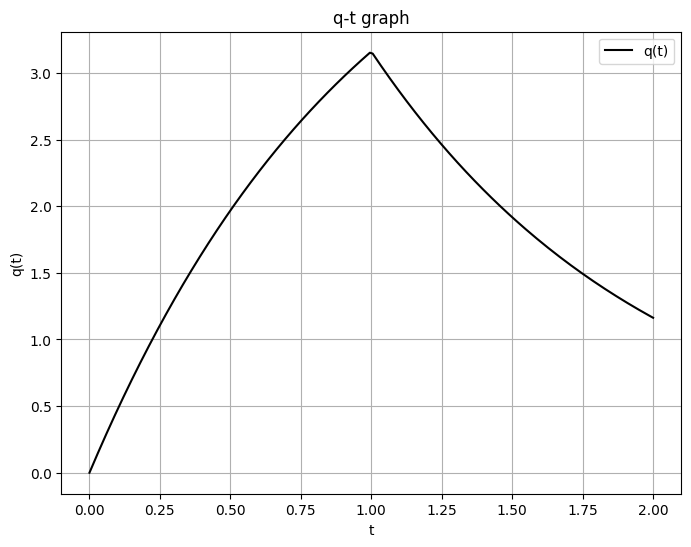

In [66]:
import numpy as np
import matplotlib.pyplot as plt

E = 5 ; R = 2 ; C = 1 ; t0 = R*C

t_values = np.linspace(0, 2 * t0, 200)
t_values_normalized = t_values/t0

def Analytic_q(t):
    if t <= t0:
        return E * C * (1 - np.exp(-t / (R * C)))
    else:
        return E * C * (np.exp(t0 / (R * C)) - 1) * np.exp(-t / (R * C))

q_values = [Analytic_q(t) for t in t_values]

plt.figure(figsize=(8, 6))
plt.plot(t_values_normalized, q_values, label="q(t)", color="black")
plt.title("q-t graph")
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend()
plt.grid(True)
plt.show()

주어진 미분방정식은 두 구간으로 나뉘어 있으며, 각 구간에서 다른 조건을 만족하는 방정식이다.


*   첫 번째 구간: $0<t\leq t_0$ \\
$$\varepsilon=R \frac{d q}{d t}+\frac{q}{C}$$ \\
$$dq=(\frac{\varepsilon}{R}-\frac{q}{RC})dt \\
\int^Q_0(\frac{1}{q-\varepsilon C})dq=-\frac{1}{RC}\int^t_0dt$$ \\
$$\ln\vert{q-\varepsilon C}\vert = -\frac{1}{RC}t + A \\
e^{-\frac{1}{RC}t+A} = \varepsilon C -q$$ \\
$$ \therefore q(t) = \varepsilon C- Ae^{-\frac{1}{RC}t}$$
이때 $t=0$일 때 $q=0$ 이므로 $A = \varepsilon C$이다. 따라서 $q(t) = \varepsilon C (1-e^{-\frac{1}{RC}t})$ 이다. \\

*   두 번째 구간: $t > t_0$
$$0=R \frac{d q}{d t}+\frac{q}{C}$$ \\
$$\frac{d q}{d t}=-\frac{q}{R C} \\
q(t) = Be^{-\frac{1}{RC}t}$$
첫 번째 구간에서 $t=t_0$일 때의 $q$는 $q(t_0)=\varepsilon C(1-e^{-\frac{t_0}{R C}})$ 이므로 $B=\varepsilon C(e^{\frac{t_0}{RC}}-1)$ 이다.
따라서 $q(t) = \varepsilon C(e^{\frac{t_0}{RC}}-1) e^{-\frac{t}{RC}}$ 이다. \\

이를 바탕으로 numpy 모듈과 matplotlib 모듈을 활용해 $q$를 $t$에 대한 그래프로 나타내었다. 변수 E는 전압을 나타내며 5로 임의로 설정하였으며, 변수 R은 저항을 나타내며 2로 임의로 지정하였다. 변수 C는 축전기의 전기용량을 나타내며, 1로 임의로 지정하였다. 변수 t0는 문제에서 주어진 것과 같이 R*C로 선언하였다. t_values는 $0$~$2t_0$의 $t$값을 저장해놓은 리스트이고, t_values_normalized는 t_values의 값을 t0로 나눠 x축을 t0에 관한 값으로 표현하기 위한 리스트이다. \\
사용자 정의함수 Analytic_q(t)는 위에서 해석적으로 구한 미분방정식의 해를 나타내는 함수로, $0<t\leq t_0$에서는 $q(t) = \varepsilon C (1-e^{-\frac{1}{RC}t})$의 값을 반환하고, $t > t_0$에서는 $q(t) = \varepsilon C(e^{\frac{t_0}{RC}}-1) e^{-\frac{t}{RC}}$의 값을 반환한다. 리스트 q_values는 t_values 값에 따른 Analytic_q(t)의 값을 담은 리스트이다. \\
이후 matplotlib를 통해 x축이 t_values_normalized이고 y축이 q_values인 그래프를 작성하였다.

B. 미분방정식을 Euler method로 풀어서 $q$를 $t$의 함수로 그리시오. [10pts]

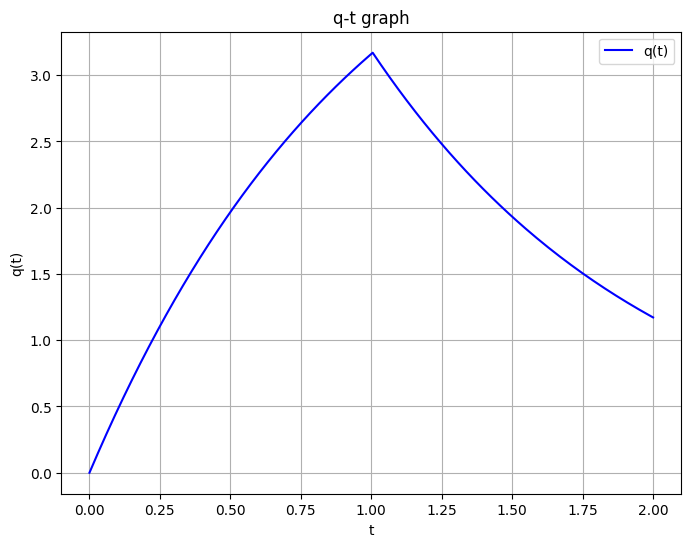

In [67]:
import numpy as np
import matplotlib.pyplot as plt

E = 5 ; R = 2 ; C = 1 ; t0 = R*C
q=0.0
dt = 0.01* t0

t_arr = []
q_arr = []

t_values = np.linspace(0, 2 * t0, 200)

for t in t_values:
  t_arr.append(t/t0)
  q_arr.append(q)

  if t<=t0:
    q += dt * (E/R - q/(C*R))
  else:
    q += dt* (-q/(C*R))


plt.figure(figsize=(8, 6))
plt.plot(t_arr, q_arr, label="q(t)", color="b")
plt.title("q-t graph")
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend()
plt.grid(True)
plt.show()

위의 코드는 오일러 방법을 활용하여 $q$를 $t$에 대한 함수로 나타내는 그래프를 그리는 코드이다. \\
초깃값은 A번 문제와 동일하게 가정하였으며, 변수 q는 전하량의 초깃값을 나타내는 값으로, 0.0으로 설정하였다. t_arr는 $t_0$에 대한 시간을 저장하는 리스트이고, q_arr는 t값에 따라 오일러 방법을 구해 도출된 q값을 저장하는 리스트이다.
이후 for문을 통해 t_values값에 따른 시간과 전하량을 각각 t_arr과 q_arr에 저장하고, 오일러 방식을 통해 q값을 업데이트 한다. for문 내의

```
if t<=t0:
    q += dt * (E/R - q/(C*R))
else:
    q += dt* (-q/(C*R))
```
는 오일러 방법의 $x(t+dt) = x(t) + f(x)dt$ 공식을 의미한다. $t \leq t_0 $에서 $\dfrac{dq}{dt}=\dfrac{\varepsilon}{R} - \dfrac{q}{RC} = f(x)$의 값을 가지고, $t > t_0 $에서 $\dfrac{dq}{dt} = -\dfrac{q}{RC} = f(x)$의 값을 가진다. \\
이후 matplotlib를 통해 x축이 t_arr이고 y축이 q_arr인 그래프를 작성하였다.

C. 미분방정식을 Runge-Kutta method로 풀어서 $q$를 $t$의 함수로 그리시오. [10pts]

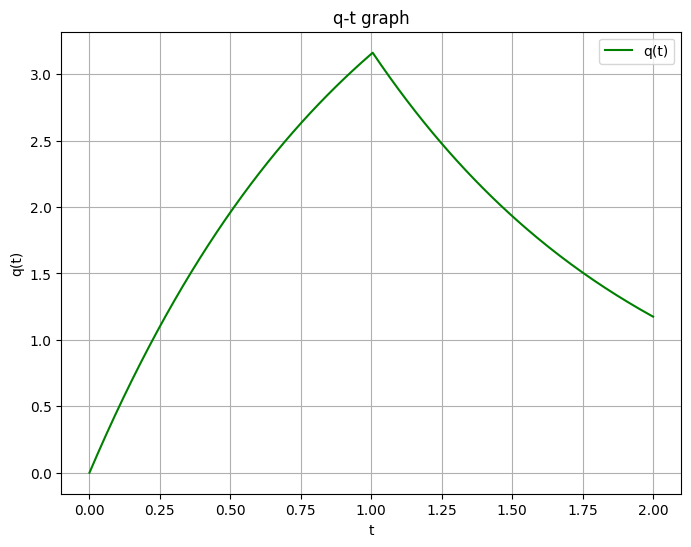

In [68]:
import numpy as np
import matplotlib.pyplot as plt

E = 5 ; R = 2 ; C = 1 ; t0 = R*C
q=0.0
dt=0.01*t0

t_arr = []
q_arr = []

t_values = np.linspace(0, 2 * t0, 200)

for t in t_values:
  t_arr.append(t/t0)
  q_arr.append(q)

  if t<=t0:
    a = E/R - q/(C*R)
    qbar = q+0.5*a*dt
    abar = E/R - qbar/(C*R)
    q += dt*abar
  else:
    a = -q/(C*R)
    qbar = q+0.5*a*dt
    abar = -qbar/(C*R)
    q += dt*abar


plt.figure(figsize=(8, 6))
plt.plot(t_arr, q_arr, label="q(t)", color="g")
plt.title("q-t graph")
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend()
plt.grid(True)
plt.show()

위의 코드는 B번의 코드에서 전하량 업데이트 함수를 2차 룬제-쿠타 방법으로 변환한 코드이다. \\
for문 내의

```
if t<=t0:
    a = E/R - q/(C*R)
    qbar = q+0.5*a*dt
    abar = E/R - qbar/(C*R)
    q += dt*abar
else:
    a = -q/(C*R)
    qbar = q+0.5*a*dt
    abar = -qbar/(C*R)
    q += dt*abar
```
는 2차 룬제-쿠타 방법의 $x(t+dt) = x(t) + f(\bar x)dt$, $\bar x \equiv x(t+\dfrac{dt}{2}) = x(t) + \dfrac{dt}{2} f(x)$ 공식을 나타내는 코드이다.  $t \leq t_0 $에서 $\dfrac{dq}{dt}=\dfrac{\varepsilon}{R} - \dfrac{q}{RC} = f(x)$의 값을 가지고, $t > t_0 $에서 $\dfrac{dq}{dt} = -\dfrac{q}{RC} = f(x)$의 값을 가진다. 이후 matplotlib를 통해 x축이 t_arr이고 y축이 q_arr인 그래프를 작성하였다.

D. 미분방정식을 Modified Euler method로 풀어서 $q$를 $t$의 함수로 그리시오. [20pts]

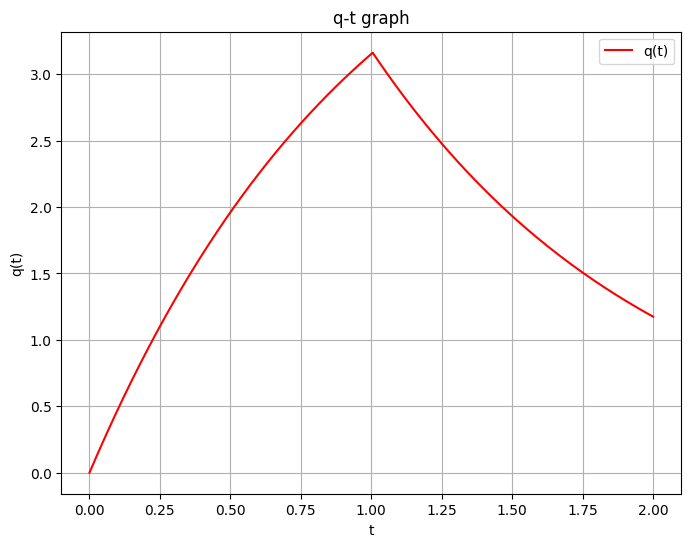

In [69]:
import numpy as np
import matplotlib.pyplot as plt

E = 5 ; R = 2 ; C = 1 ; t0 = R*C
q=0.0
dt=0.01*t0

t_arr = []
q_arr = []

t_values = np.linspace(0, 2 * t0, 200)

for t in t_values:
  t_arr.append(t/t0)
  q_arr.append(q)

  if t<=t0:
    a = E/R - q/(C*R)
    qbar = q+a*dt
    abar = E/R - qbar/(C*R)
    q += dt*(a+abar)/2
  else:
    a = -q/(C*R)
    qbar = q+a*dt
    abar = -qbar/(C*R)
    q += dt*(a+abar)/2


plt.figure(figsize=(8, 6))
plt.plot(t_arr, q_arr, label="q(t)", color="r")
plt.title("q-t graph")
plt.xlabel("t")
plt.ylabel("q(t)")
plt.legend()
plt.grid(True)
plt.show()

위의 코드는 B번의 코드에서 전하량 업데이트 함수를 수정-오일러 방법으로 변환한 코드이다. \\
for문 내의

```
if t<=t0:
    a = E/R - q/(C*R)
    qbar = q+a*dt
    abar = E/R - qbar/(C*R)
    q += dt*(a+abar)/2
else:
    a = -q/(C*R)
    qbar = q+a*dt
    abar = -qbar/(C*R)
    q += dt*(a+abar)/2
```
는 수정-오일러 방법의 $x(t+dt) = x(t) + \dfrac{f(x) + f(\bar x)}{2}$, $\bar x \equiv x(t+dt) = x(t) + dt f(x)$ 공식을 나타내는 코드이다.  $t \leq t_0 $에서 $\dfrac{dq}{dt}=\dfrac{\varepsilon}{R} - \dfrac{q}{RC} = f(x)$의 값을 가지고, $t > t_0 $에서 $\dfrac{dq}{dt} = -\dfrac{q}{RC} = f(x)$의 값을 가진다. 이후 matplotlib를 통해 x축이 t_arr이고 y축이 q_arr인 그래프를 작성하였다.

E. $\Delta t = 0.01t_0$로 두고 Euler, Runge-Kutta, Modified Euler method 각각 $q$의 오차(수치적
해와 해석적 해의 차이)를 $t$의 함수로 그리고, Euler method의 오차가 상대적으로 크게 나타남을 확인해보세요. [20pts]

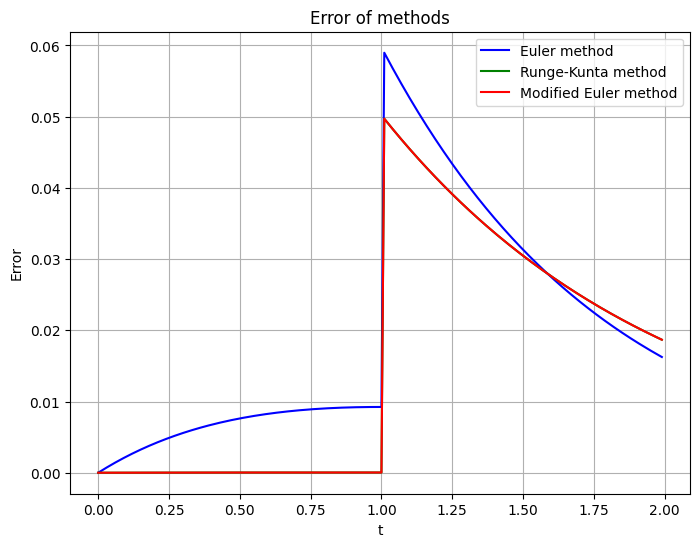

In [70]:
import numpy as np
import matplotlib.pyplot as plt

E = 5 ; R = 2 ; C = 1 ; t0 = R*C

t_values = np.linspace(0, 2 * t0, 200)
t_values_normalized = t_values/t0

def Analytic_q(t):
    if t <= t0:
        return E * C * (1 - np.exp(-t / (R * C)))
    else:
        return E * C * (np.exp(t0 / (R * C)) - 1) * np.exp(-t / (R * C))

def qdiff1(dt): #Euler method
  q=0.0
  t_arr = []
  qdiff1_arr = []

  for t in np.arange(0, 2 * t0, dt):
    t_arr.append(t/t0)
    qdiff1_arr.append(abs(q-Analytic_q(t)))

    if t<=t0:
      q += dt * (E/R - q/(C*R))
    else:
      q += dt* (-q/(C*R))

  return (t_arr, qdiff1_arr)

def qdiff2(dt): #Runge-Kunta method
  q=0.0
  t_arr = []
  qdiff2_arr = []

  for t in np.arange(0, 2 * t0, dt):
    t_arr.append(t/t0)
    qdiff2_arr.append(abs(q-Analytic_q(t)))

    if t<=t0:
      a = E/R - q/(C*R)
      qbar = q+0.5*a*dt
      abar = E/R - qbar/(C*R)
      q += dt*abar
    else:
      a = -q/(C*R)
      qbar = q+0.5*a*dt
      abar = -qbar/(C*R)
      q += dt*abar

  return (t_arr, qdiff2_arr)

def qdiff3(dt): #Modified Euler method
  q=0.0
  t_arr = []
  qdiff3_arr = []

  for t in np.arange(0, 2 * t0, dt):
    t_arr.append(t/t0)
    qdiff3_arr.append(abs(q-Analytic_q(t)))

    if t<=t0:
      a = E/R - q/(C*R)
      qbar = q+a*dt
      abar = E/R - qbar/(C*R)
      q += dt*(a+abar)/2
    else:
      a = -q/(C*R)
      qbar = q+a*dt
      abar = -qbar/(C*R)
      q += dt*(a+abar)/2

  return (t_arr, qdiff3_arr)


dt = 0.01*t0
t_arr1, qdiff1_arr = qdiff1(dt)
t_arr2, qdiff2_arr = qdiff2(dt)
t_arr3, qdiff3_arr = qdiff3(dt)

plt.figure(figsize=(8, 6))
plt.plot(t_arr1, qdiff1_arr, label="Euler method", color="b")
plt.plot(t_arr2, qdiff2_arr, label="Runge-Kunta method", color="g")
plt.plot(t_arr3, qdiff3_arr, label="Modified Euler method", color="r")
plt.title("Error of methods")
plt.xlabel("t")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

위의 코드는 $\Delta t = 0.01t_0$일 때 Euler, Runge-Kutta, Modified Euler method 각각 $q$의 오차를 $t$에 대한 그래프로 그린 코드이다. \\
초기 변수는 이전 문제들과 동일하게 선언하였다. 사용자 정의함수 Analytic_q(t)는 해석적으로 구한 미분방정식의 해를 나타내는 함수로, $0<t\leq t_0$에서는 $q(t) = \varepsilon C (1-e^{-\frac{1}{RC}t})$의 값을 반환하고, $t > t_0$에서는 $q(t) = \varepsilon C(e^{\frac{t_0}{RC}}-1) e^{-\frac{t}{RC}}$의 값을 반환한다. 사용자 정의함수 qdiff1(dt)는 오일러 방법을 사용하여 도출해낸 q값과 참값 사이의 오차를 계산하는 함수로, t_arr와 qdiff1_arr에 각각 시간과 q값의 오차를 저장한 뒤 이를 반환한다. 사용자 정의함수 qdiff2(dt)는 2차 룬제-쿠타 방법을 사용하여 도출해낸 q값과 참값 사이의 오차를 계산하는 함수로, t_arr와 qdiff2_arr에 각각 시간과 q값의 오차를 저장한 뒤 이를 반환한다.
사용자 정의함수 qdiff3(dt)는 수정 오일러 방법을 사용하여 도출해낸 q값과 참값 사이의 오차를 계산하는 함수로, t_arr와 qdiff3_arr에 각각 시간과 q값의 오차를 저장한 뒤 이를 반환한다. 이후 dt를 $0.01t_0$로 선언하였으며, 변수 t_arr1, qdiff1_arr에 qdiff1(dt)의 반환값을, t_arr2, qdiff2_arr에 qdiff2(dt)의 반환값을, t_arr3, qdiff3_arr에 qdiff3(dt)의 반환값을 저장한 뒤 x축이 t_arr이고, y축이 각각 qdiff1_arr(파란색), qdiff2_arr(초록색), qdiff3_arr(빨간색)인 그래프를 작성하였다. \\
위 그래프를 통해 Euler method의 오차가 Runge-Kunta method와 Modified Euler method의 오차보다 상대적으로 크다는 사실을 알 수 있다. 이는 각 방법의 정확도의 차이에서 기인하는 것으로, Euler method는 $O(\Delta t)$의 정확도를 가지지만, Runge-Kunta method와 Modified Euler method는 $O(\Delta t^2)$의 정확도를 가지기 때문에 상대적으로 참값과 유사한 값을 가지게 된다.